In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.load data

In [2]:
df = pd.read_csv('./data/Classified Data', index_col = 0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


##### 2 EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


##### 3. x, y divide

In [4]:
y = df['TARGET CLASS']
x = df.drop('TARGET CLASS',axis=1)

##### 4 train data, test data split

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state = 12)

##### 5 알고리즘 import

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
knn = KNeighborsClassifier(n_neighbors = 5)  # n_neighbors = 5 : 00개 만큼 뽑아서 결정

##### 알고리즘 train => model 생성

In [8]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

##### model predict => test data

In [9]:
predictions = knn.predict(x_test)
predictions

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0], dtype=int64)

##### model evaluation

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
confusion_matrix(y_test, predictions)

array([[94,  9],
       [ 6, 91]], dtype=int64)

In [12]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       103
           1       0.91      0.94      0.92        97

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



In [13]:
acc_list = []

for i in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    preds = knn.predict(x_test)
    acc = np.mean(y_test.values ==  preds)
    acc_list.append(acc)
acc_list

[0.93,
 0.925,
 0.945,
 0.935,
 0.925,
 0.94,
 0.94,
 0.945,
 0.93,
 0.94,
 0.94,
 0.935,
 0.935,
 0.94,
 0.935,
 0.94,
 0.945,
 0.945,
 0.95,
 0.945,
 0.945,
 0.945,
 0.945,
 0.945,
 0.945,
 0.94,
 0.95,
 0.945,
 0.94,
 0.94,
 0.945,
 0.95,
 0.955,
 0.95,
 0.95,
 0.96,
 0.95,
 0.955,
 0.95,
 0.955,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.945,
 0.945,
 0.945,
 0.95,
 0.945,
 0.945,
 0.945,
 0.95,
 0.95,
 0.95,
 0.945,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95]

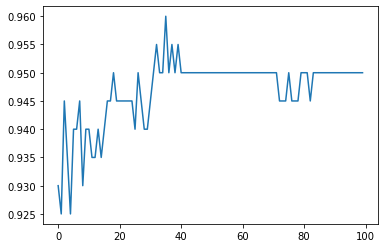

In [14]:
plt.plot(acc_list)

In [15]:
acc_list.index(0.96)

35

In [16]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       103
           1       0.92      0.98      0.95        97

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

